### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [60]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


1. display 5 columns from dataset

In [ ]:
#1
url = "https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv"
data = pd.read_csv(url)

data.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [ ]:
#2
data.info()

#conclusion

# The dataset contains 6,194 entries and 10 columns, indicating a fairly large dataset for analysis.
# The race column has a significant number of missing values (1,842 missing, since only 4,352 out of 6,194 are non-null).
# The admission column has a high percentage of missing values (only 1,000 non-null values).
# there are 1 bool, 3 float, 1 int, and 5 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [ ]:
#3a
race_count = data['race'].value_counts(dropna=False)
print("Race Column Unique Values:\n", race_count)

Race Column Unique Values:
 race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


In [ ]:
#3b
admission_count = data['admission'].value_counts(dropna=False)
print("\nAdmission Column Unique Values:\n", admission_count)


Admission Column Unique Values:
 admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [ ]:
#4
data['admission'].fillna('deny', inplace=True)
data['race'].fillna('other', inplace=True)

print(data[['admission', 'race']].isnull().sum())

admission    0
race         0
dtype: int64


5. recheck missing value

In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [ ]:
# 6
data.drop(columns=['application_id'], inplace=True)

print(data.head())

   gender  international   gpa       major      race   gmat  work_exp  \
0  Female          False  3.30    Business     Asian  620.0       3.0   
1    Male          False  3.28  Humanities     Black  680.0       5.0   
2  Female           True  3.30    Business     other  710.0       5.0   
3    Male          False  3.47        STEM     Black  690.0       6.0   
4    Male          False  3.35        STEM  Hispanic  590.0       5.0   

           work_industry admission  
0     Financial Services     Admit  
1  Investment Management      deny  
2             Technology     Admit  
3             Technology      deny  
4             Consulting      deny  


7. show describe column and conclude what the insight is from that column

In [ ]:
#7
description = data.describe()
description

#conclusion
# The minimum GPA is 2.65 and the maximum is 3.77
# The minimum score is 570, and the maximum is 780, showing a healthy range of scores.
# The minimum work experience is 1 year, while the maximum is 9 years, which shows a diverse range of backgrounds.

# The combination of solid GPAs and GMAT scores suggests that the applicant pool is competitive,
# with many individuals likely to meet or exceed the typical admission standards of top MBA programs.
# The range in work experience indicates a mix of recent graduates and experienced professionals, which can enhance classroom dynamics and peer learning.

# Given that some applicants have lower GPAs and GMAT scores,
# there may be opportunities for support or preparation programs targeting those students to help them strengthen their applications.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


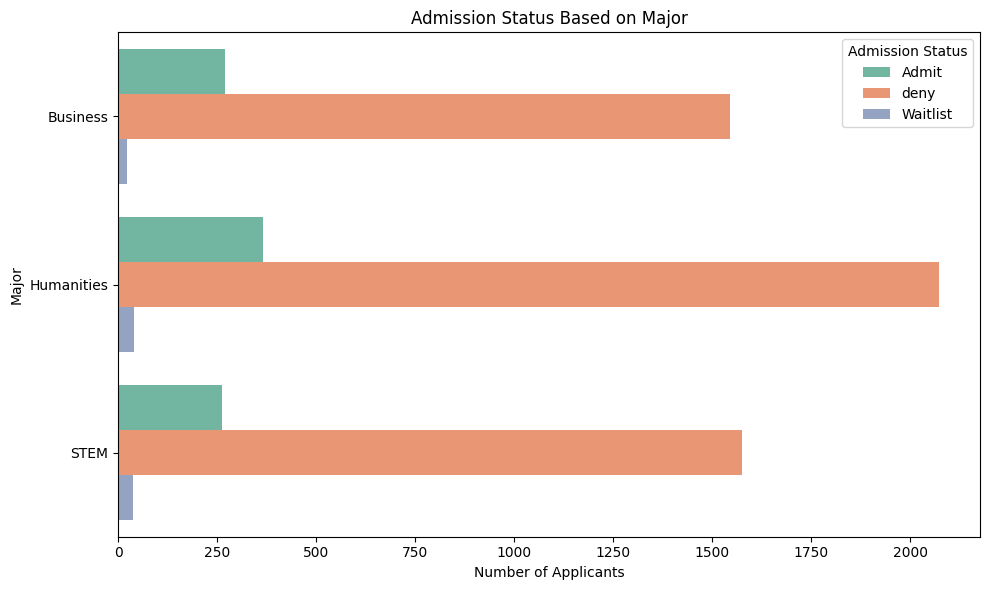

In [ ]:
#8
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='major', hue='admission', palette='Set2')
plt.title('Admission Status Based on Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')
plt.tight_layout()
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


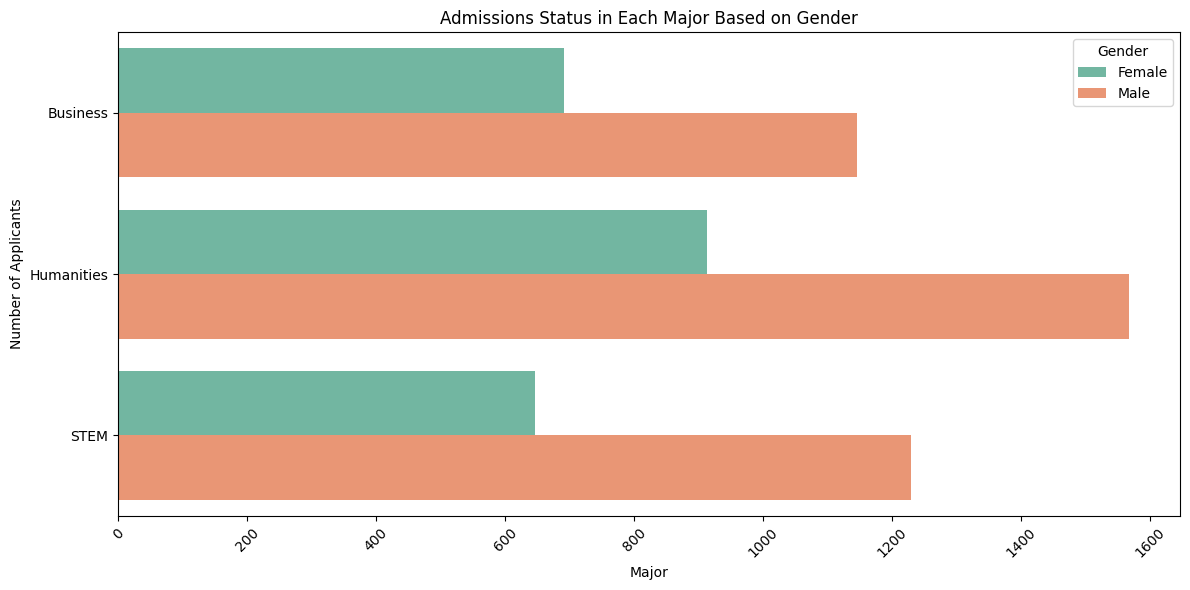

In [ ]:
#9
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='major', hue='gender', palette='Set2', dodge=True)
plt.title('Admissions Status in Each Major Based on Gender')
plt.xlabel('Major')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


10. create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


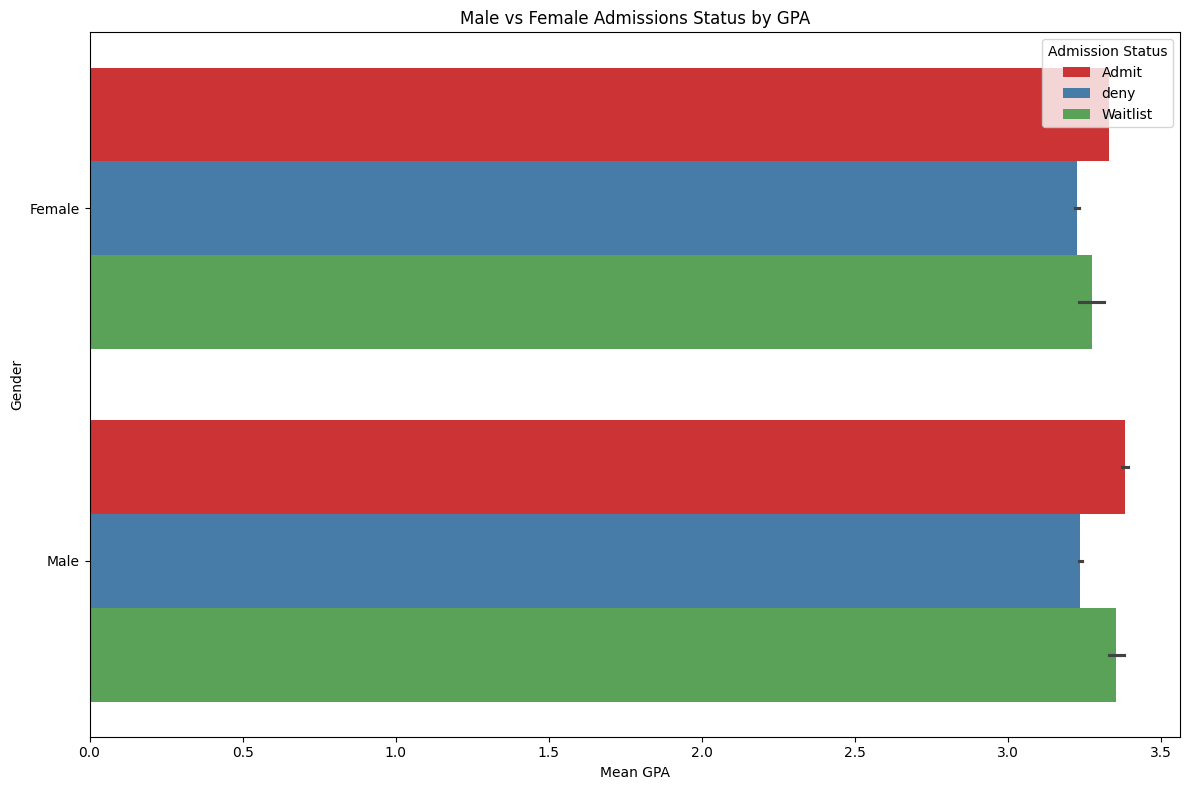

In [ ]:
#10
plt.figure(figsize=(12, 8))
sns.barplot(data=data, y='gender', x='gpa', hue='admission', palette='Set1', estimator=np.mean)
plt.title('Male vs Female Admissions Status by GPA')
plt.xlabel('Mean GPA')
plt.ylabel('Gender')
plt.legend(title='Admission Status', loc='upper right')
plt.tight_layout()
plt.show()

# conclusion : there are differences in admissions status between genders and majors.
# For example, female applicants seem to have a higher overall admission rate compared to male applicants,
# especially when considering the "deny" category.
# Additionally, the mean GPA for admitted students varies across majors,
# suggesting that certain majors have higher academic requirements for admission.

11. create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


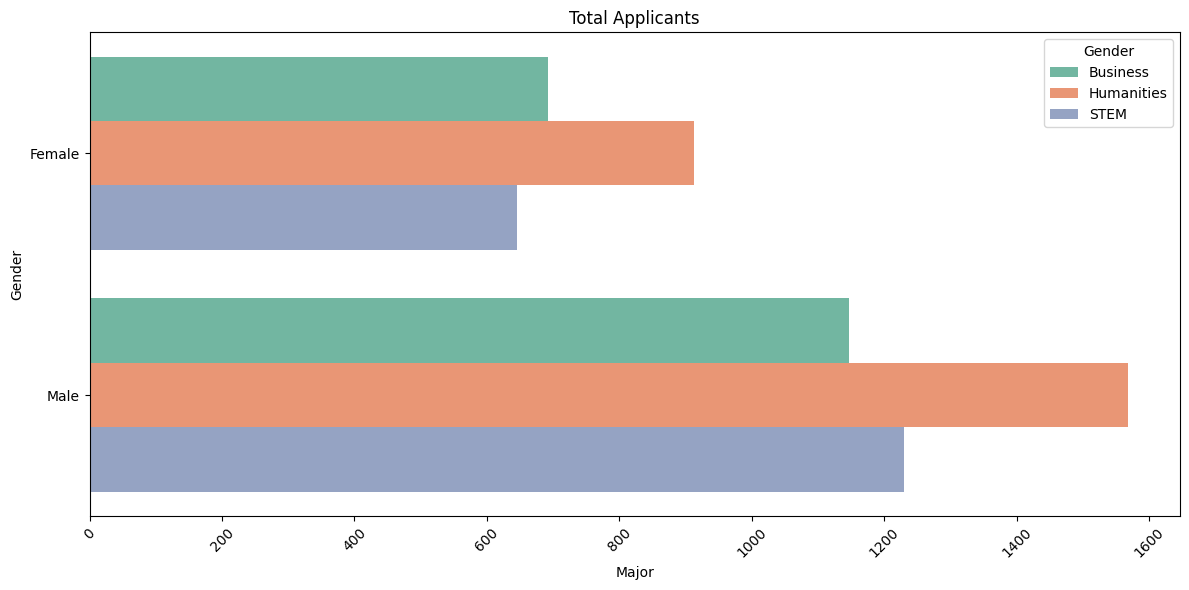

In [ ]:
#11
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='gender', hue='major', palette='Set2', dodge=True)
plt.title('Total Applicants')
plt.xlabel('Major')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Overall, more male applicants are observed compared to female applicants. Business is the most popular major among both genders,
# followed by Humanities and then STEM. While the total number of applicants for Humanities is higher than STEM,
#the number of female applicants in STEM is significantly higher than in Humanities.#

12. encode categorical columns and display the results

In [ ]:
#12a
#encode X
label_encoder = LabelEncoder()

data['gender'] = label_encoder.fit_transform(data['gender'])
data['international'] = label_encoder.fit_transform(data['international'])
data['major'] = label_encoder.fit_transform(data['major'])
data['race'] = label_encoder.fit_transform(data['race'])
data['work_industry'] = label_encoder.fit_transform(data['work_industry'])

data.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


In [ ]:
#12b
#encode y
label_encoder = LabelEncoder()

data['admission'] = label_encoder.fit_transform(data['admission'])

data[['admission']].head()


,admission
0,0
1,2
2,0
3,2
4,2


13. create a heatmap to see the correlation and explain the conclusion

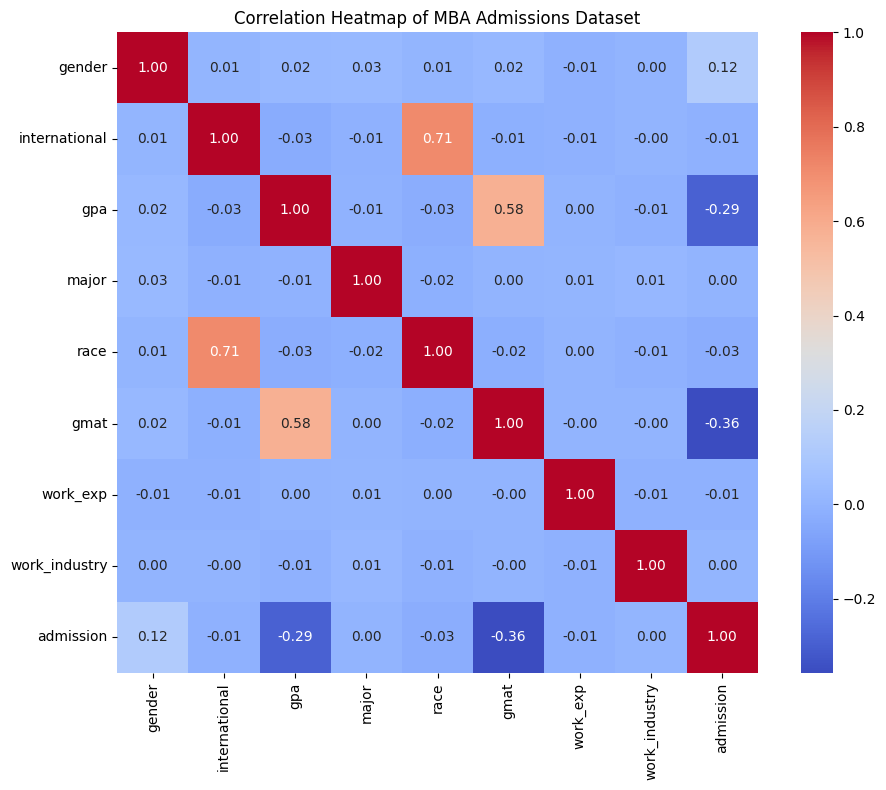

In [58]:
#13
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True,  mask=None)
plt.title('Correlation Heatmap of MBA Admissions Dataset')
plt.tight_layout()
plt.show()

#Conclusion


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [66]:
avg_gpa = data['gpa'].mean()
print(avg_gpa)

Lisa = {'gender': 0,  # Female (assuming Lisa is female, adjust if otherwise)
    'international': 0,  # Local student
    'gpa': avg_gpa,  # Use the calculated average GPA
    'major': 0,  # Entrepreneurship (assuming it falls under Business, adjust if needed)
    'race': 2,  # Asian
    'gmat': 580,
    'work_exp': 2,  # 2018 to 2020
    'work_industry': 2  # Finance (adjust if needed based on encoding)
}

Lisa = pd.DataFrame(Lisa, index=[0])
Lisa

X = data.drop('admission', axis=1)
y = data['admission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

Lisa_pred = model.predict(Lisa)
Lisa_pred

Lisa_pred = model.predict(Lisa)

if Lisa_pred == 0:
  print("Lisa will be Admitted!")
elif Lisa_pred == 1:
  print("Lisa will be Denied.")
else:
  print("Lisa will be Waitlisted.")

3.2507135938004517
Lisa will be Waitlisted.
